# Exploratory Data Analysis (EDA)

### imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load data

In [2]:
df = pd.read_csv('consumption_temp.csv')
df.head()

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


## Overview

In [9]:
# convert 'date' column to datetime
df['time'] = pd.to_datetime(df['time'])

print(df.info())

# count missing values in each column
print(df.isnull().sum())

# count duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49494 entries, 0 to 49493
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         49494 non-null  datetime64[ns]
 1   location     49494 non-null  object        
 2   consumption  49494 non-null  float64       
 3   temperature  49494 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.5+ MB
None
time           0
location       0
consumption    0
temperature    0
dtype: int64
Number of duplicate rows: 0


### Unique zones

In [15]:
# count unique locations
print(f"Number of unique locations: {df['location'].nunique()}")

# print unique values in 'location' column
print(f"Unique locations: {df['location'].unique()}")

# create subsets for each location
df_bergen = df[df['location'] == 'bergen']
df_oslo = df[df['location'] == 'oslo']
df_stavanger = df[df['location'] == 'stavanger']
df_tromso = df[df['location'] == 'tromsø']
df_trondheim = df[df['location'] == 'trondheim']
df_helsingfors = df[df['location'] == 'helsingfors']

# show the history range, first datetime to last datetime for each location
print(f"Bergen date range: {df_bergen['time'].min()} to {df_bergen['time'].max()}")
print(f"Oslo date range: {df_oslo['time'].min()} to {df_oslo['time'].max()}")
print(f"Stavanger date range: {df_stavanger['time'].min()} to {df_stavanger['time'].max()}")
print(f"Tromsø date range: {df_tromso['time'].min()} to {df_tromso['time'].max()}")
print(f"Trondheim date range: {df_trondheim['time'].min()} to {df_trondheim['time'].max()}")
print(f"Helsingfors date range: {df_helsingfors['time'].min()} to {df_helsingfors['time'].max()}")

print("(ex.) Bergen history length:", len(df_bergen))
df_bergen.head()

Number of unique locations: 6
Unique locations: ['bergen' 'oslo' 'stavanger' 'tromsø' 'trondheim' 'helsingfors']
Bergen date range: 2022-04-07 21:00:00 to 2023-04-02 21:00:00
Oslo date range: 2022-04-07 21:00:00 to 2023-04-02 21:00:00
Stavanger date range: 2022-04-07 21:00:00 to 2023-04-02 21:00:00
Tromsø date range: 2022-04-07 21:00:00 to 2023-04-02 21:00:00
Trondheim date range: 2022-04-07 21:00:00 to 2023-04-02 21:00:00
Helsingfors date range: 2022-07-14 21:00:00 to 2023-04-02 21:00:00
(ex.) Bergen history length: 8641


,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
5,2022-04-07 22:00:00,bergen,1.050327,0.0
10,2022-04-07 23:00:00,bergen,1.008794,-0.5
15,2022-04-08 00:00:00,bergen,0.984202,-1.1
20,2022-04-08 01:00:00,bergen,0.950335,-0.7


## Bergen

                      time  consumption  temperature
count                 8641  8641.000000  8641.000000
mean   2022-10-04 21:00:00     1.876716     7.750237
min    2022-04-07 21:00:00     0.443192   -15.600000
25%    2022-07-06 21:00:00     0.834003     3.100000
50%    2022-10-04 21:00:00     1.380962     8.100000
75%    2023-01-02 21:00:00     2.998324    12.200000
max    2023-04-02 21:00:00     4.650816    29.299999
std                    NaN     1.156034     6.556976


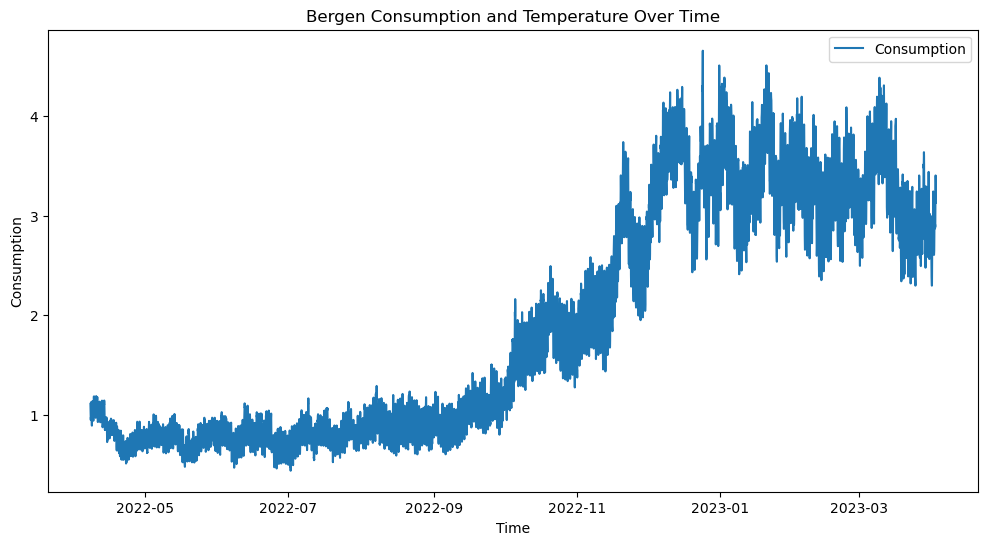

In [17]:
# do eda on bergen subset
print(df_bergen.describe())
plt.figure(figsize=(12, 6))
plt.plot(df_bergen['time'], df_bergen['consumption'], label='Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Bergen Consumption and Temperature Over Time')
plt.legend()
plt.show()

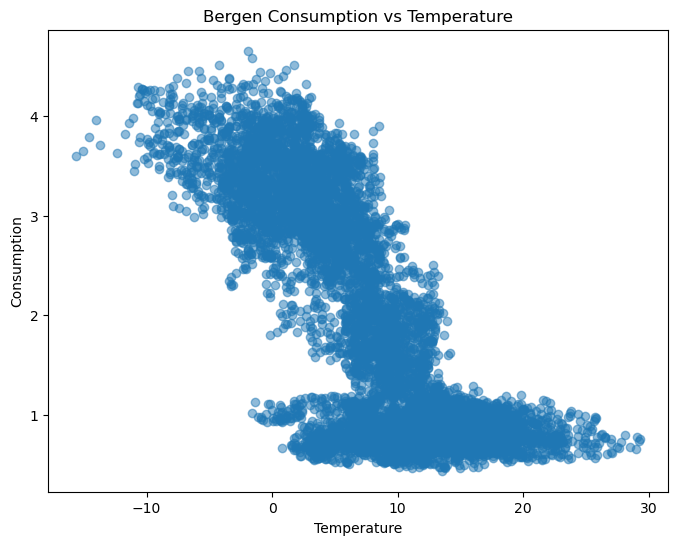

In [18]:
# consumption vs temperature scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_bergen['temperature'], df_bergen['consumption'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Consumption')
plt.title('Bergen Consumption vs Temperature')
plt.show()

### Trends

/var/folders/5j/rf69ky7d5r7c6q9vmn2z2psw0000gn/T/ipykernel_48601/2033186299.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bergen_hourly = df_bergen['consumption'].resample('H').mean()
/var/folders/5j/rf69ky7d5r7c6q9vmn2z2psw0000gn/T/ipykernel_48601/2033186299.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bergen_monthly = df_bergen['consumption'].resample('M').mean()


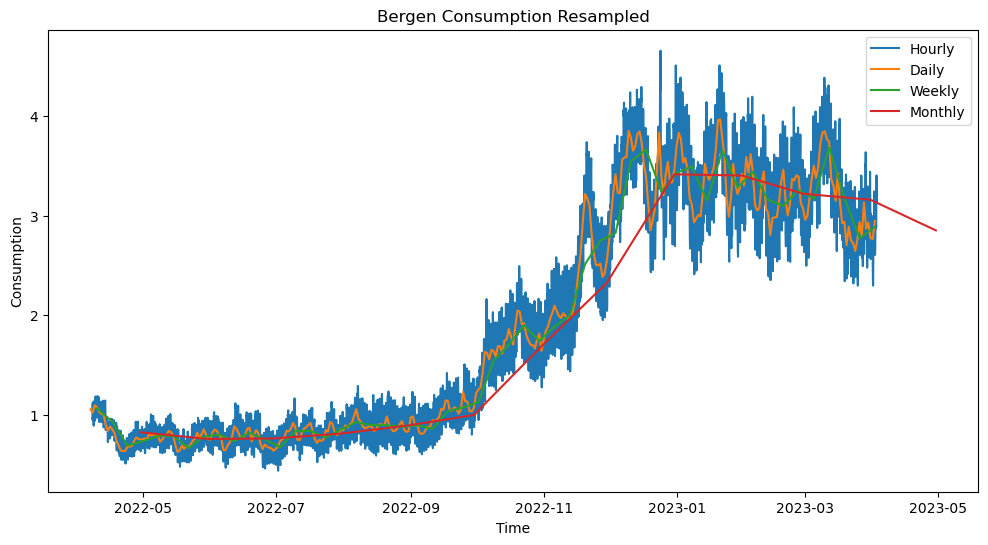

In [19]:
# Hourly, daily, weekly, monthly resampling of bergen consumption
df_bergen.set_index('time', inplace=True)
bergen_hourly = df_bergen['consumption'].resample('H').mean()
bergen_daily = df_bergen['consumption'].resample('D').mean()
bergen_weekly = df_bergen['consumption'].resample('W').mean()
bergen_monthly = df_bergen['consumption'].resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(bergen_hourly.index, bergen_hourly, label='Hourly')
plt.plot(bergen_daily.index, bergen_daily, label='Daily')
plt.plot(bergen_weekly.index, bergen_weekly, label='Weekly')
plt.plot(bergen_monthly.index, bergen_monthly, label='Monthly')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Bergen Consumption Resampled')
plt.legend()
plt.show()

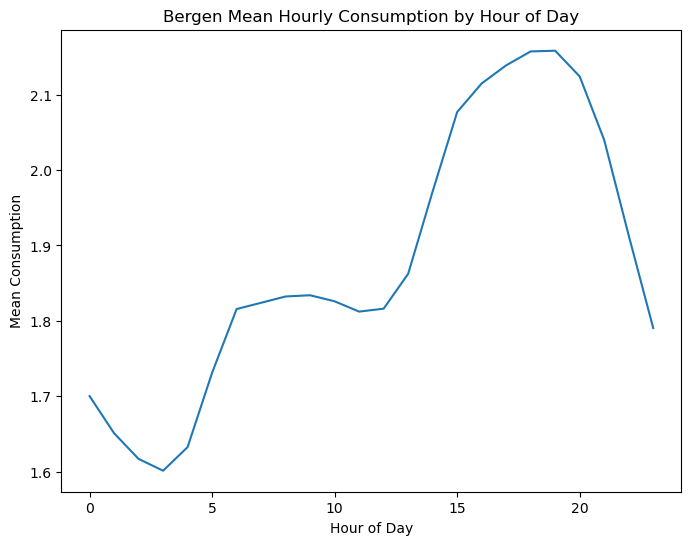

In [20]:
# hourly mean consumption by hour of day
bergen_hourly_mean = df_bergen['consumption'].groupby(df_bergen.index.hour).mean()
plt.figure(figsize=(8, 6))
plt.plot(bergen_hourly_mean.index, bergen_hourly_mean)
plt.xlabel('Hour of Day')
plt.ylabel('Mean Consumption')
plt.title('Bergen Mean Hourly Consumption by Hour of Day')
plt.show()

is_holiday
False    1.876731
True     1.864910
Name: consumption, dtype: float64
is_holiday
False    1.891079
True     1.460135
Name: consumption, dtype: float64


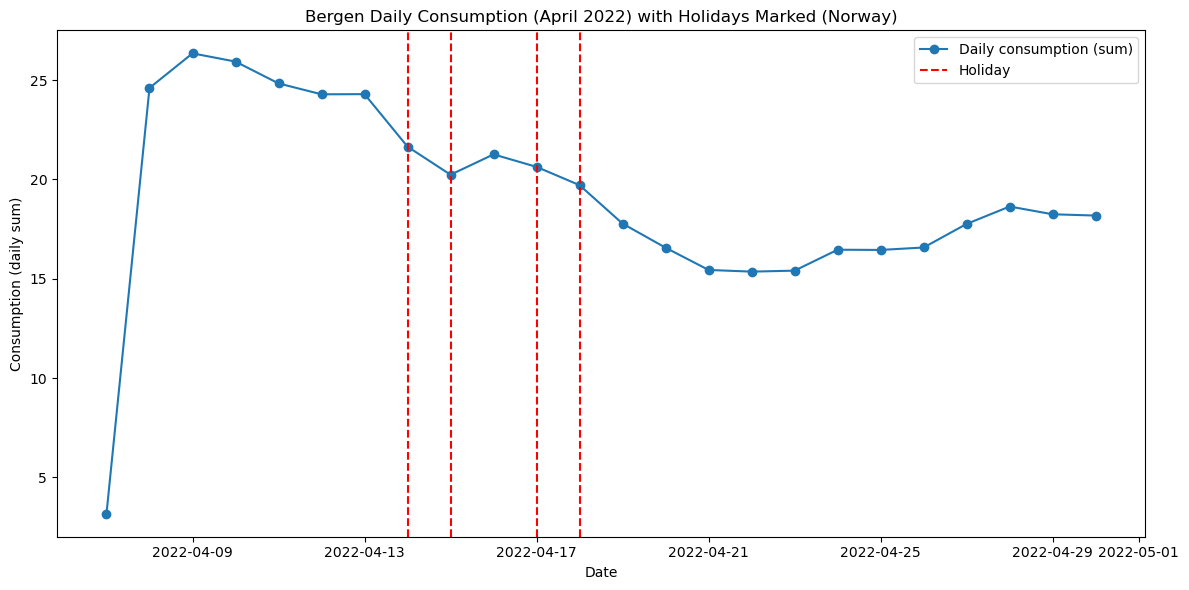

In [ ]:
# Ensure datetime index
df_bergen = df_bergen.copy()
df_bergen.index = pd.to_datetime(df_bergen.index)

# --- Build Norwegian holidays for the relevant years ---
years = sorted(df_bergen.index.year.unique().tolist())
no_holidays = pyholidays.Norway(years=years)  # date -> name

# Create a holiday DatetimeIndex at midnight (same tz-awareness as df_bergen)
holiday_dates = pd.to_datetime(list(no_holidays.keys()))  # midnight timestamps (naive)

# If your df has timezone-aware index, localize the holiday dates to the same tz
if df_bergen.index.tz is not None:
    holiday_dates = holiday_dates.tz_localize(df_bergen.index.tz)

# Add flag (works for hourly data: true for hours that fall on holiday date)
df_bergen["is_holiday"] = df_bergen.index.normalize().isin(holiday_dates)

bergen_holiday_consumption = df_bergen.groupby("is_holiday")["consumption"].mean()
print(bergen_holiday_consumption)

# ---- Plot April 2022 as DAILY SUMS and mark holidays ----
april_bergen = df_bergen.loc["2022-04-01":"2022-04-30 23:59:59"]
daily_april = april_bergen["consumption"].resample("D").sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_april.index, daily_april.values, marker="o", label="Daily consumption (sum)")

# Mark holidays in April 2022
april_holidays = holiday_dates[(holiday_dates.year == 2022) & (holiday_dates.month == 4)]

holiday_label_added = False
for ts in april_holidays:
    if ts in daily_april.index:
        plt.axvline(
            x=ts,
            color="r",
            linestyle="--",
            label="Holiday" if not holiday_label_added else None,
        )
        holiday_label_added = True

plt.xlabel("Date")
plt.ylabel("Consumption (daily sum)")
plt.title("Bergen Daily Consumption (April 2022) with Holidays Marked (Norway)")
plt.legend()
plt.tight_layout()
plt.show()





## subplot the other locations

Oslo describe:
                      time  consumption  temperature
count                 8641  8641.000000  8641.000000
mean   2022-10-04 21:00:00     6.876428     7.392883
min    2022-04-07 21:00:00     1.520560   -15.400000
25%    2022-07-06 21:00:00     2.610569     0.900000
50%    2022-10-04 21:00:00     4.871180     7.900000
75%    2023-01-02 21:00:00    11.458471    14.200000
max    2023-04-02 21:00:00    18.045011    29.799999
std                    NaN     4.672634     8.770901


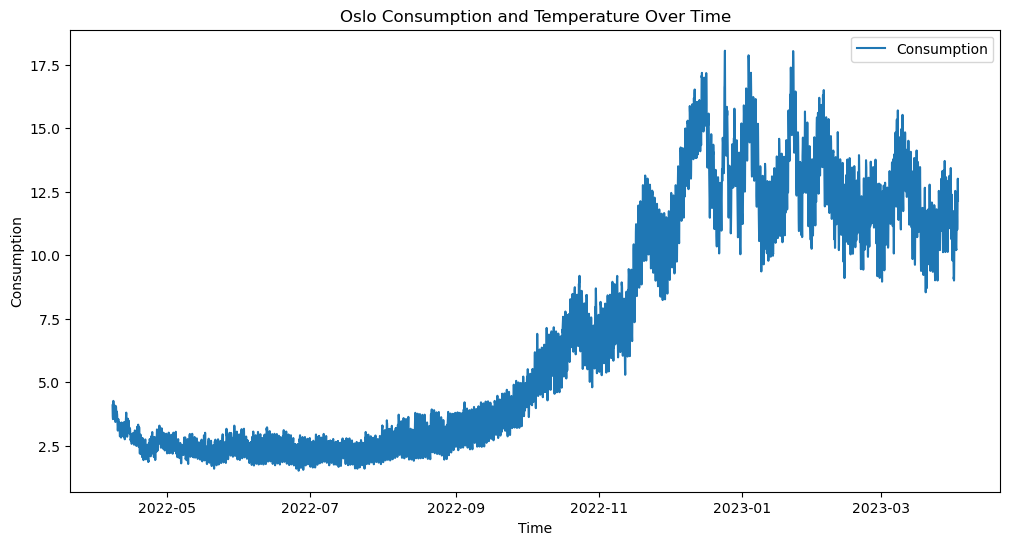

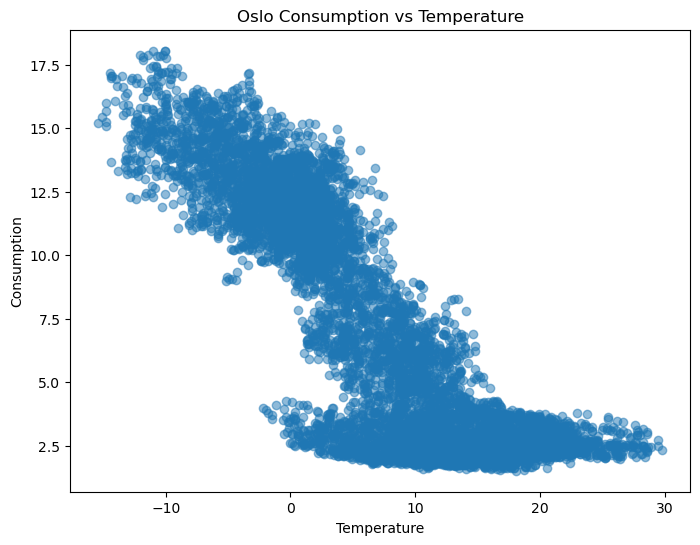

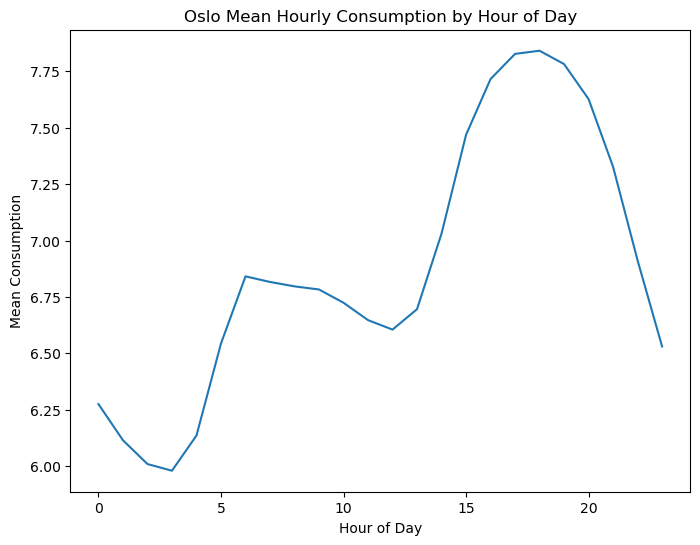

Stavanger describe:
                      time  consumption  temperature
count                 8641  8641.000000  8641.000000
mean   2022-10-04 21:00:00     3.304703     8.547795
min    2022-04-07 21:00:00     0.832372    -9.200000
25%    2022-07-06 21:00:00     1.382764     4.300000
50%    2022-10-04 21:00:00     2.390667     8.900000
75%    2023-01-02 21:00:00     5.398822    12.700000
max    2023-04-02 21:00:00     8.763147    27.000000
std                    NaN     2.112962     5.839943


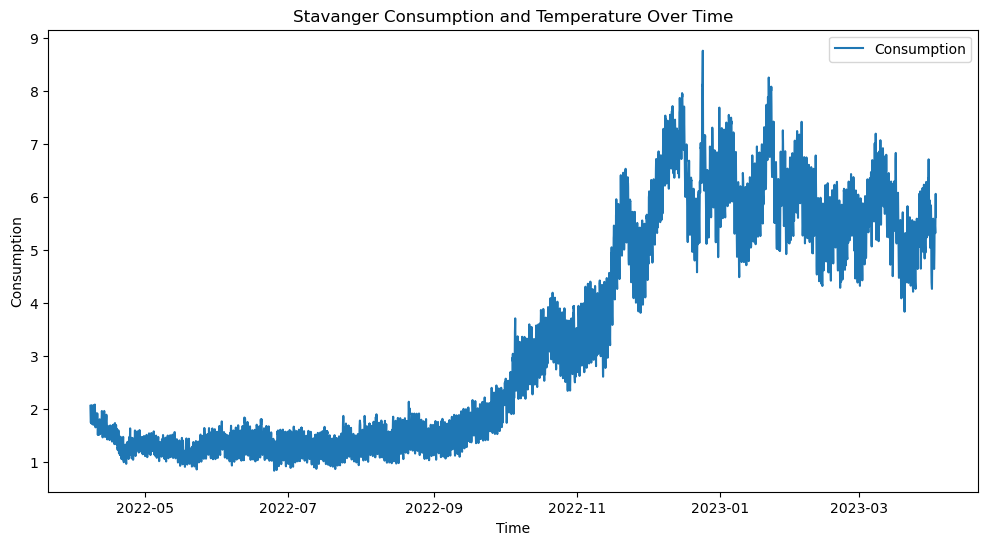

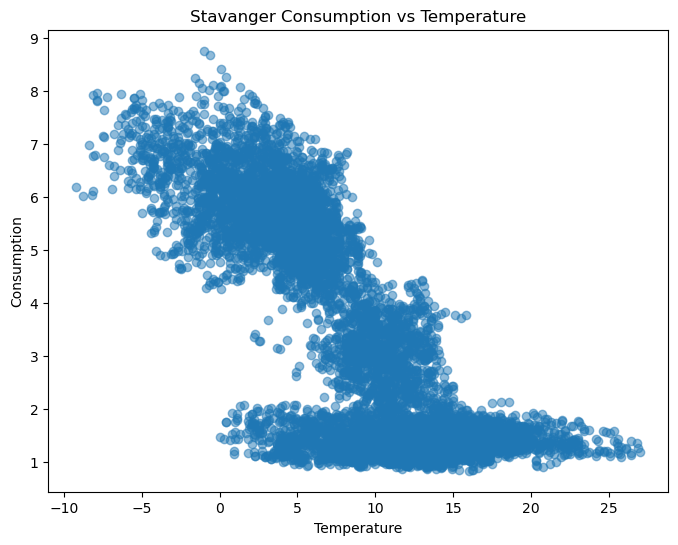

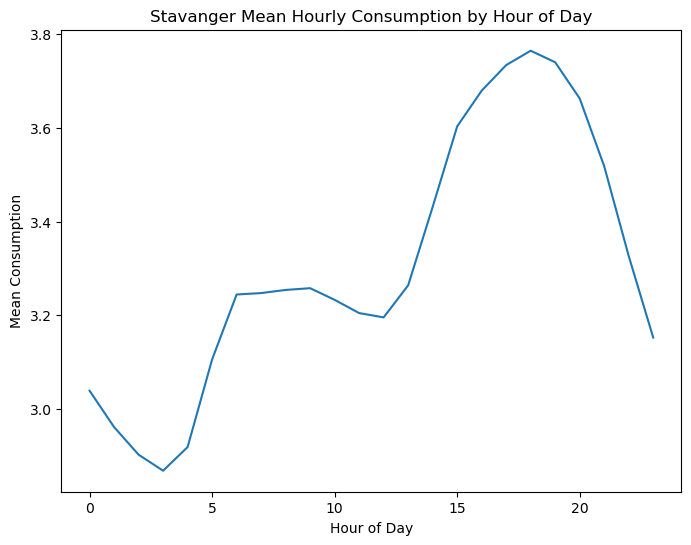

Tromsø describe:
                      time  consumption  temperature
count                 8641  8641.000000  8641.000000
mean   2022-10-04 21:00:00     1.340776     3.514119
min    2022-04-07 21:00:00     0.372637   -14.600000
25%    2022-07-06 21:00:00     0.831883    -2.600000
50%    2022-10-04 21:00:00     1.195308     2.800000
75%    2023-01-02 21:00:00     1.874898     9.600000
max    2023-04-02 21:00:00     2.552159    29.799999
std                    NaN     0.559151     7.967161


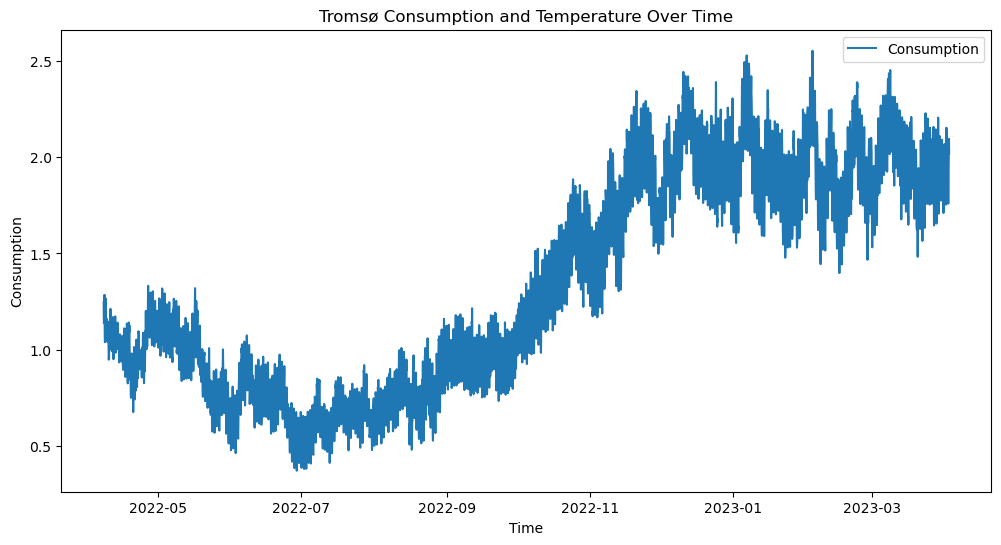

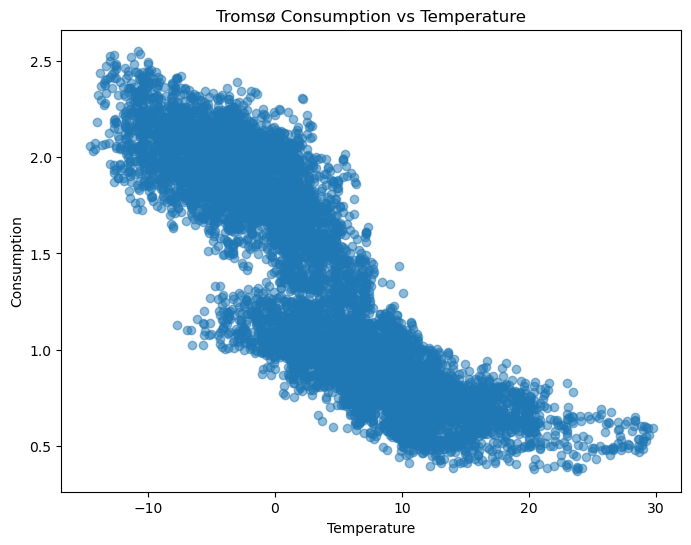

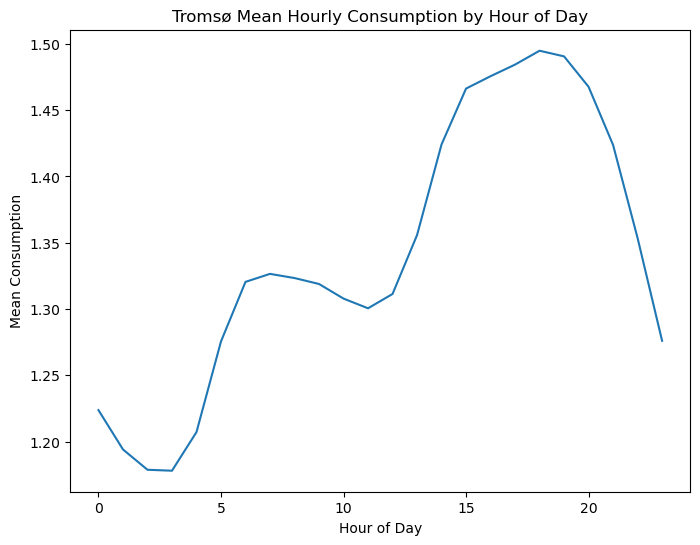

Trondheim describe:
                      time  consumption  temperature
count                 8641  8641.000000  8641.000000
mean   2022-10-04 21:00:00     2.278574     6.213621
min    2022-04-07 21:00:00     0.620001   -17.299999
25%    2022-07-06 21:00:00     1.263027     1.100000
50%    2022-10-04 21:00:00     1.841736     6.500000
75%    2023-01-02 21:00:00     3.376217    11.600000
max    2023-04-02 21:00:00     5.099158    30.500000
std                    NaN     1.137311     7.616749


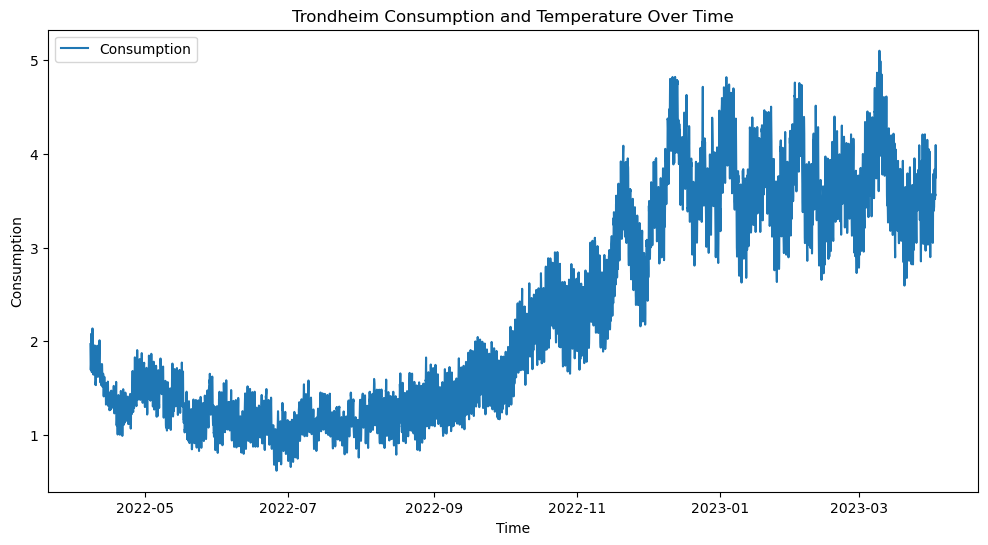

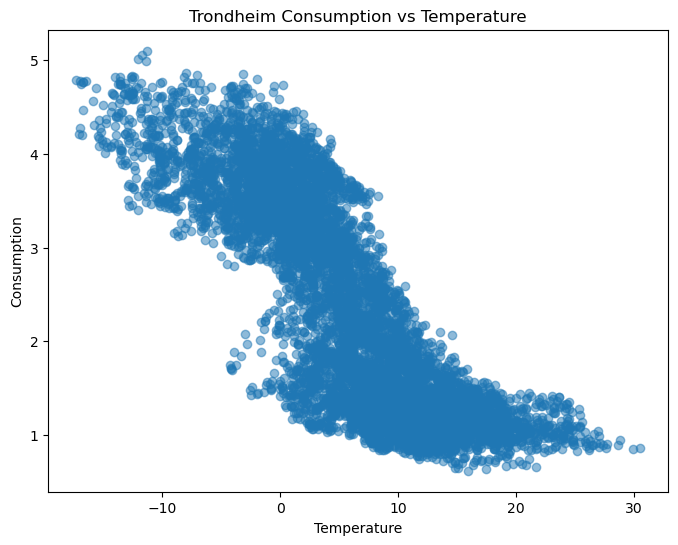

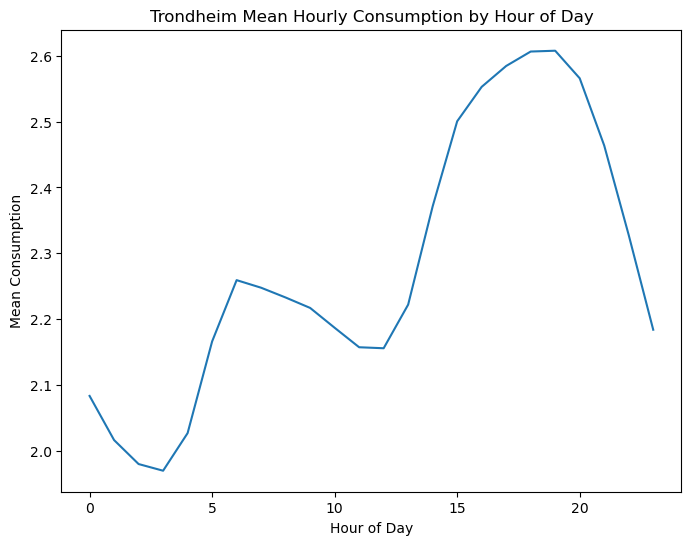

Helsingfors describe:
                                time  consumption  temperature
count                           6289  6289.000000  6289.000000
mean   2022-11-22 21:00:00.000000256     6.077242     5.662903
min              2022-07-14 21:00:00     0.000000   -10.100000
25%              2022-09-18 09:00:00     6.189000    -0.300000
50%              2022-11-22 21:00:00     6.354000     3.100000
75%              2023-01-27 09:00:00     6.474000    11.600000
max              2023-04-02 21:00:00     7.860000    24.000000
std                              NaN     0.919462     7.592141


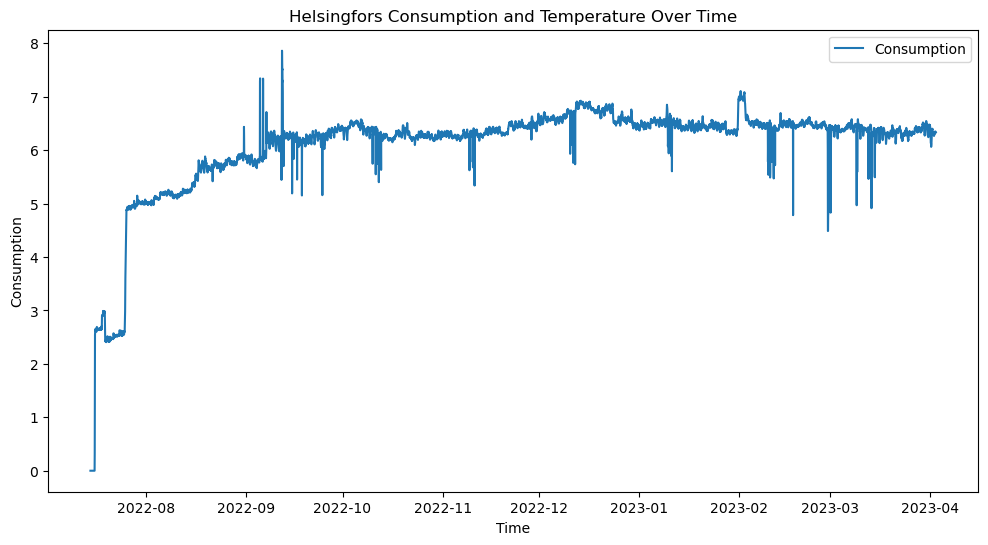

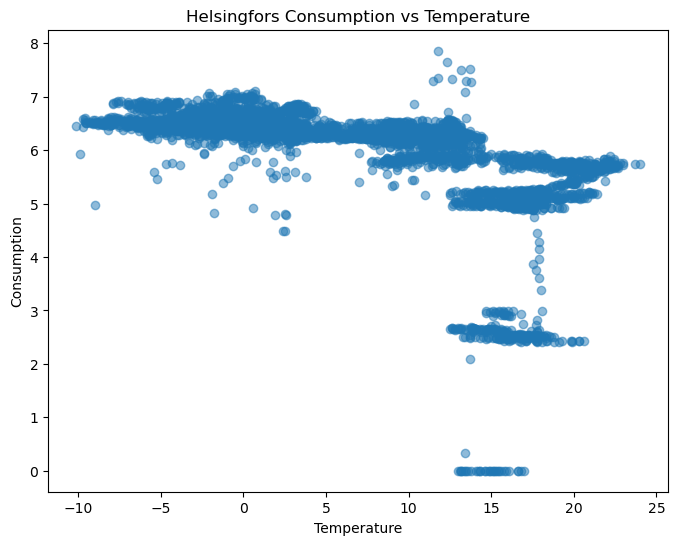

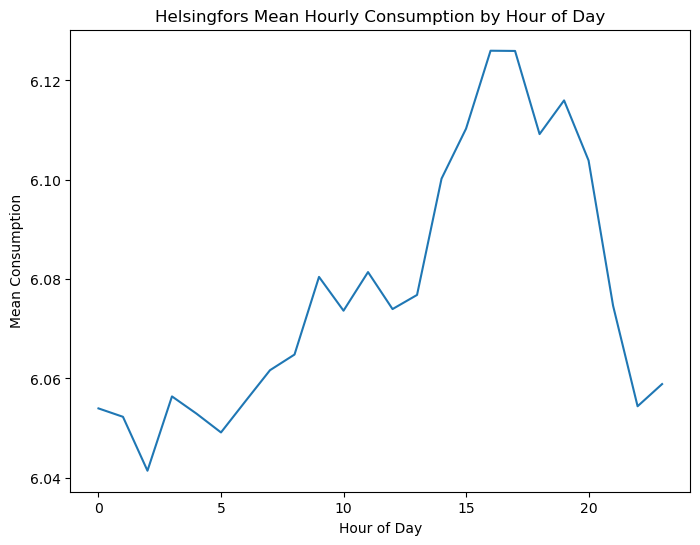

In [31]:
# create similar, smaller plots for all other locations

locations = {
    'oslo': df_oslo,
    'stavanger': df_stavanger,
    'tromsø': df_tromso,
    'trondheim': df_trondheim,
    'helsingfors': df_helsingfors,
}
for loc_name, loc_df in locations.items():
    print(loc_name.capitalize(), "describe:")
    print(loc_df.describe())
    plt.figure(figsize=(12, 6))
    plt.plot(loc_df['time'], loc_df['consumption'], label='Consumption')
    plt.xlabel('Time')
    plt.ylabel('Consumption')
    plt.title(f'{loc_name.capitalize()} Consumption and Temperature Over Time')
    plt.legend()
    plt.show()

    # consumption vs temperature scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(loc_df['temperature'], loc_df['consumption'], alpha=0.5)
    plt.xlabel('Temperature')
    plt.ylabel('Consumption')
    plt.title(f'{loc_name.capitalize()} Consumption vs Temperature')
    plt.show()

    # hourly mean consumption by hour of day
    loc_df.set_index('time', inplace=True)
    loc_hourly_mean = loc_df['consumption'].groupby(loc_df.index.hour).mean()
    plt.figure(figsize=(8, 6))
    plt.plot(loc_hourly_mean.index, loc_hourly_mean)
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Consumption')
    plt.title(f'{loc_name.capitalize()} Mean Hourly Consumption by Hour of Day')
    plt.show()

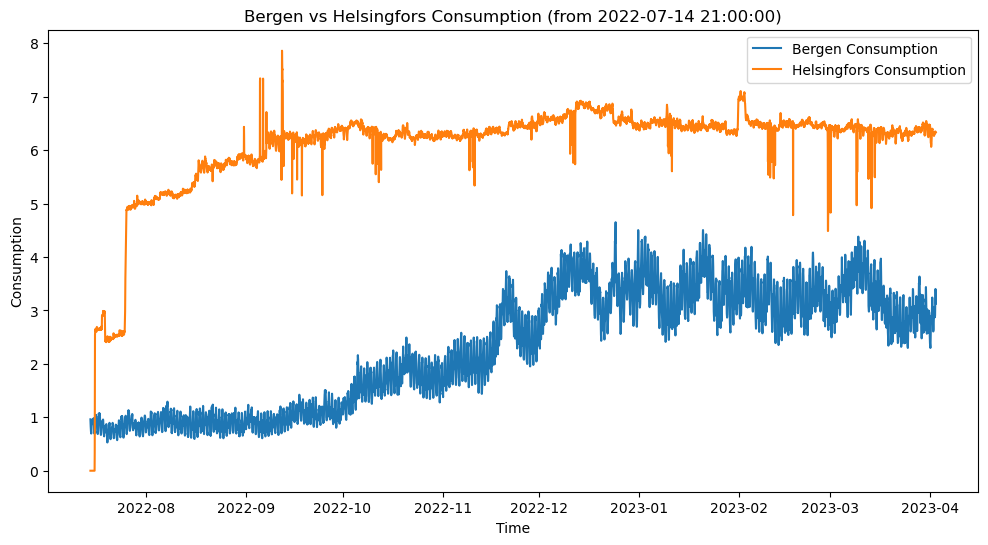

In [32]:
# compare bergen from similar horizon as helsingfors (2022-07-14 21:00:00->)

bergen_subset = df_bergen.loc['2022-07-14 21:00:00':]
helsingfors_subset = df_helsingfors.loc['2022-07-14 21:00:00':]

plt.figure(figsize=(12, 6))
plt.plot(bergen_subset.index, bergen_subset['consumption'], label='Bergen Consumption')
plt.plot(helsingfors_subset.index, helsingfors_subset['consumption'], label='Helsingfors Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Bergen vs Helsingfors Consumption (from 2022-07-14 21:00:00)')
plt.legend()
plt.show()

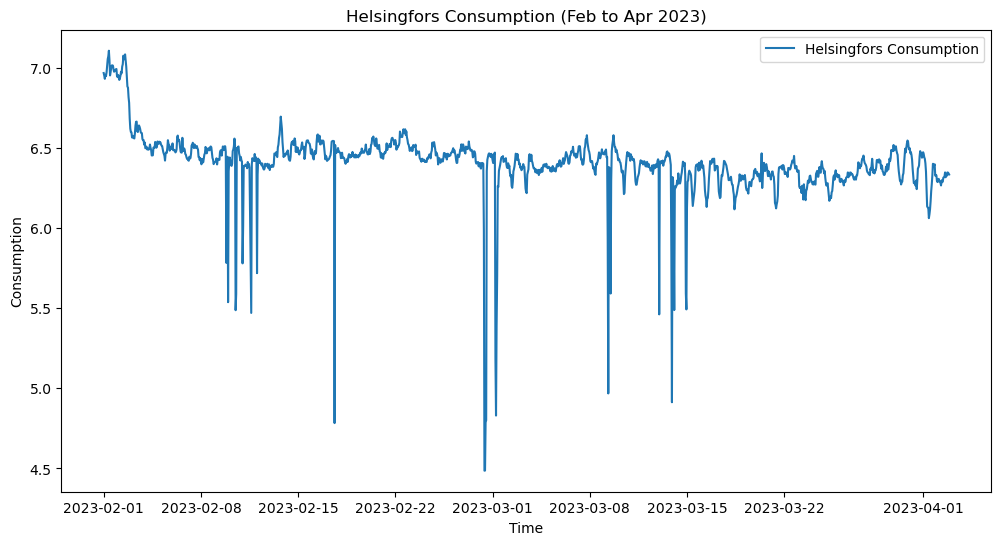

In [33]:
# look closer at helsingfors hourly consumption pattern 2023-02 to 2023-04 to inspect spikes

helsingfors_feb_apr = df_helsingfors.loc['2023-02-01':'2023-04-30'] 
plt.figure(figsize=(12, 6))
plt.plot(helsingfors_feb_apr.index, helsingfors_feb_apr['consumption'], label='Helsingfors Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Helsingfors Consumption (Feb to Apr 2023)')
plt.legend()
plt.show() 

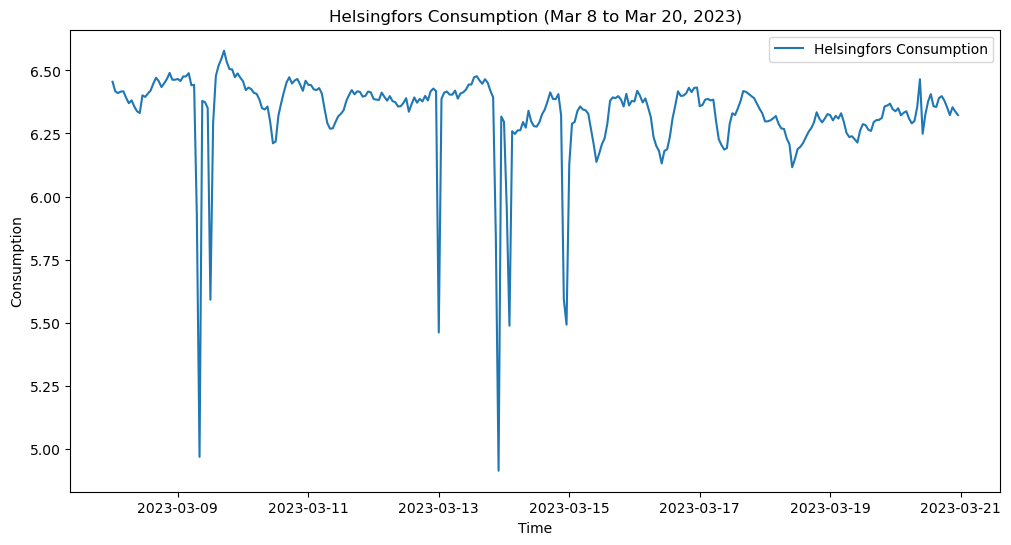

In [34]:
# inspect helsingfors 2023-03-08 to 2023-03-20

helsingfors_mar = df_helsingfors.loc['2023-03-08':'2023-03-20']
plt.figure(figsize=(12, 6))
plt.plot(helsingfors_mar.index, helsingfors_mar['consumption'], label='Helsingfors Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Helsingfors Consumption (Mar 8 to Mar 20, 2023)')
plt.legend()
plt.show()

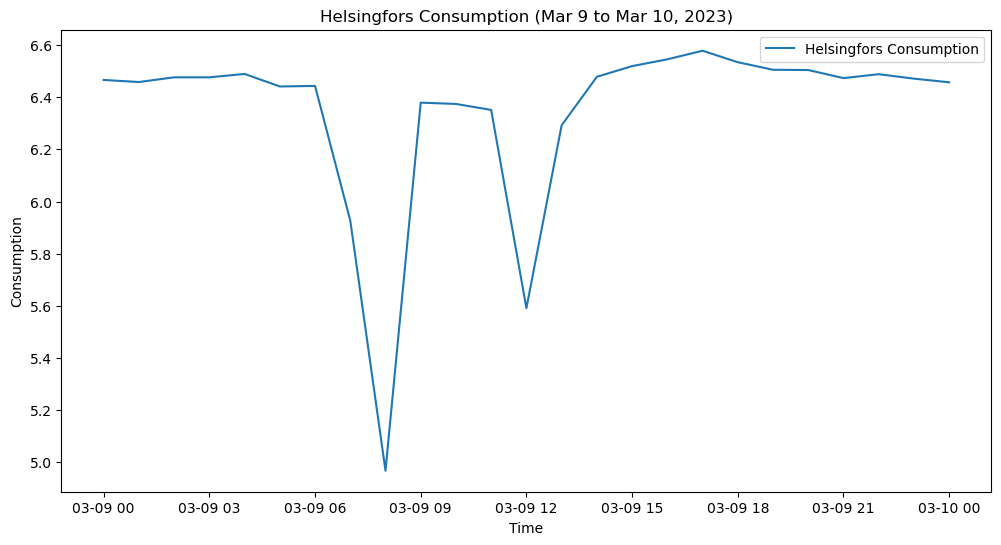

In [36]:
# inspect helsingfors hourly 2023-03-09 to 2023-03-10 00

helsingfors_mar_9_10 = df_helsingfors.loc['2023-03-09':'2023-03-10 00']
plt.figure(figsize=(12, 6))
plt.plot(helsingfors_mar_9_10.index, helsingfors_mar_9_10['consumption'], label='Helsingfors Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Helsingfors Consumption (Mar 9 to Mar 10, 2023)')
plt.legend()
plt.show()

In [7]:
df = pd.read_csv('consumption_temp.csv')

def preprocess_data(df, city, starting_date):
    """Basic preprocessing: filter by city, convert time to datetime, set index, sort, filter by starting date."""
    df = df.copy()
    df["datetime"] = pd.to_datetime(df["time"])

    city_norm = city.strip().lower()
    df_city = df[df["location"].astype(str).str.strip().str.lower() == city_norm].copy()

    df_city = df_city.set_index("datetime").sort_index()
    df_city = df_city.loc[pd.Timestamp(starting_date):]

    return df_city

location_df = preprocess_data(df, city='bergen', starting_date='2022-08-01') 
location_df.head(5)



,time,location,consumption,temperature
datetime,,,,
2022-08-01 00:00:00,2022-08-01 00:00:00,bergen,0.730897,9.0
2022-08-01 01:00:00,2022-08-01 01:00:00,bergen,0.716152,9.5
2022-08-01 02:00:00,2022-08-01 02:00:00,bergen,0.721158,9.6
2022-08-01 03:00:00,2022-08-01 03:00:00,bergen,0.734186,9.5
2022-08-01 04:00:00,2022-08-01 04:00:00,bergen,0.785847,9.9


In [8]:
def add_time_features(
    df: pd.DataFrame,
    *,
    target_col: str = "consumption",
    temp_col: str | None = "temperature",
    delay_days: int = 5,
    drop_cols: list[str] | None = None,
    add_cyclical: bool = True,
    add_consumption_lags: bool = True,
    add_consumption_rollings: bool = True,
    cons_lags: tuple[int, ...] = (120, 168),
    cons_rolling_windows: tuple[int, ...] = (168, 336),
    temp_lags: tuple[int, ...] = (24, 168),
    temp_rolling_windows: tuple[int, ...] = (24, 168),
) -> pd.DataFrame:
    """
    Feature engineering for hourly day-ahead. 5 day data delay on consumption.

    Returns a NEW dataframe.
    """
    if not isinstance(df.index, pd.DatetimeIndex):
        raise TypeError("DataFrame index must be a DatetimeIndex.")

    out = df.copy()
    delay_h = int(delay_days * 24)

    # Basic calendar features (used for cyclical encodings)
    hour = out.index.hour
    dow = out.index.dayofweek
    month = out.index.month
    woy = out.index.isocalendar().week.astype(int)

    out["is_weekend"] = (dow >= 5).astype(int)
    out["hour"] = hour
    out["day_of_week"] = dow
    out["month"] = month
    out["week_of_year"] = woy

    # Cyclical encodings
    if add_cyclical:
        out["hour_sin"] = np.sin(2 * np.pi * hour / 24.0)
        out["hour_cos"] = np.cos(2 * np.pi * hour / 24.0)

        out["dow_sin"] = np.sin(2 * np.pi * dow / 7.0)
        out["dow_cos"] = np.cos(2 * np.pi * dow / 7.0)

        out["month_sin"] = np.sin(2 * np.pi * (month - 1) / 12.0)
        out["month_cos"] = np.cos(2 * np.pi * (month - 1) / 12.0)

        out["woy_sin"] = np.sin(2 * np.pi * (woy - 1) / 52.0)
        out["woy_cos"] = np.cos(2 * np.pi * (woy - 1) / 52.0)

    # Temperature features 
    out[temp_col] = out[temp_col].astype(float)

    for k in temp_lags:
        out[f"temp_lag_{k}"] = out[temp_col].shift(k)

    shifted_temp = out[temp_col].shift(1)
    for w in temp_rolling_windows:
        out[f"temp_roll_mean_{w}"] = shifted_temp.rolling(window=w, min_periods=w).mean()
        out[f"temp_roll_std_{w}"]  = shifted_temp.rolling(window=w, min_periods=w).std()

    out["heating_degree_18"] = np.maximum(0.0, 18.0 - out[temp_col])

    # Consumption lag features, available with 5 day delay
    if add_consumption_lags:
        for k in cons_lags:
            out[f"lag_{k}"] = out[target_col].shift(k)

    # Consumption rolling stats
    if add_consumption_rollings:
        avail = out[target_col].shift(delay_h)
        for w in cons_rolling_windows:
            out[f"avail_roll_mean_{w}"] = avail.rolling(window=w, min_periods=w).mean()
            out[f"avail_roll_std_{w}"]  = avail.rolling(window=w, min_periods=w).std()

    # Drop redundant raw time columns
    out = out.drop(columns=[c for c in ["hour", "day_of_week", "month", "week_of_year"] if c in out.columns])

    # Optional drops
    if drop_cols:
        out = out.drop(columns=[c for c in drop_cols if c in out.columns])

    return out

In [9]:
# Feature engineering cell
data = location_df.copy()

data = add_time_features(
    data,
    target_col="consumption",
    temp_col="temperature",
    delay_days=5,
    drop_cols=["time", "location", "datetime"],
    cons_lags=(120, 168), # safe under 5-day delay data constraint
    cons_rolling_windows=(168, 336),
    temp_lags=(24, 168),
    temp_rolling_windows=(24, 168),
)

# drop NaNs introduced by lag/rolling features
data = data.dropna()

data.head(5)

,consumption,temperature,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos,month_sin,month_cos,woy_sin,...,temp_roll_std_24,temp_roll_mean_168,temp_roll_std_168,heating_degree_18,lag_120,lag_168,avail_roll_mean_168,avail_roll_std_168,avail_roll_mean_336,avail_roll_std_336
datetime,,,,,,,,,,,,,,,,,,,,,
2022-08-19 23:00:00,0.790461,12.5,0,-0.258819,0.965926,-0.433884,-0.900969,-0.5,-0.866025,-0.663123,...,2.240499,16.776786,4.022228,5.5,0.752648,0.804632,0.901162,0.137629,0.915201,0.146364
2022-08-20 00:00:00,0.734402,11.8,1,0.000000,1.000000,-0.974928,-0.222521,-0.5,-0.866025,-0.663123,...,2.275448,16.783333,4.014311,6.2,0.658317,0.767826,0.900023,0.138844,0.914985,0.146690
2022-08-20 01:00:00,0.715569,13.3,1,0.258819,0.965926,-0.974928,-0.222521,-0.5,-0.866025,-0.663123,...,2.335594,16.786905,4.009578,4.7,0.625492,0.729298,0.898776,0.140364,0.914715,0.147140
2022-08-20 02:00:00,0.689392,13.1,1,0.500000,0.866025,-0.974928,-0.222521,-0.5,-0.866025,-0.663123,...,2.356117,16.795238,4.000805,4.9,0.617041,0.704031,0.897597,0.141895,0.914406,0.147657
2022-08-20 03:00:00,0.701503,12.3,1,0.707107,0.707107,-0.974928,-0.222521,-0.5,-0.866025,-0.663123,...,2.381903,16.803571,3.991576,5.7,0.629022,0.690910,0.896401,0.143308,0.914093,0.148151


In [10]:
# ==========================================
# Correlation analysis (EDA) — build vectors
# ==========================================
# Goal: Create "aligned vectors" for correlation that respect the 5-day delay.
# We correlate y(t) with features that would be available when predicting y(t).
#
# Uses: `data` (feature-engineered dataframe, hourly, already dropna()'d)
# Assumes: target_col = "consumption"

import numpy as np
import pandas as pd

target_col = "consumption"
delay_days = 5
delay_h = 24 * delay_days

# Choose which engineered feature groups to include in correlation EDA
# (keep it focused; these are the most interpretable)
corr_feature_groups = [
    "lag_",              # lag_120, lag_168, ...
    "avail_roll_",       # avail_roll_mean_168, ...
    "temp_",             # temp_lag_*, temp_roll_*
    "heating_degree_",   # heating proxy
    "hour_", "dow_", "month_", "woy_", "is_weekend", "temperature"
]

# Pick features by name (simple heuristic)
def select_corr_features(df: pd.DataFrame) -> list[str]:
    cols = []
    for c in df.columns:
        if c == target_col:
            continue
        if c == "is_weekend" or c == "temperature":
            cols.append(c)
            continue
        for prefix in corr_feature_groups:
            if c.startswith(prefix):
                cols.append(c)
                break
    # remove duplicates, keep order
    seen = set()
    out = []
    for c in cols:
        if c not in seen:
            out.append(c)
            seen.add(c)
    return out

corr_features = select_corr_features(data)

# Build correlation vectors dataframe
# - remove any non-finite values
corr_df = data[[target_col] + corr_features].copy()
corr_df = corr_df.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Correlation dataframe shape: {corr_df.shape}")
print(f"Number of features in correlation analysis: {len(corr_features)}")
corr_features[:20]


Correlation dataframe shape: (5423, 24)
Number of features in correlation analysis: 23


['temperature',
 'is_weekend',
 'hour_sin',
 'hour_cos',
 'dow_sin',
 'dow_cos',
 'month_sin',
 'month_cos',
 'woy_sin',
 'woy_cos',
 'temp_lag_24',
 'temp_lag_168',
 'temp_roll_mean_24',
 'temp_roll_std_24',
 'temp_roll_mean_168',
 'temp_roll_std_168',
 'heating_degree_18',
 'lag_120',
 'lag_168',
 'avail_roll_mean_168']

,feature,pearson_corr_with_target
0,lag_120,0.923390
1,lag_168,0.919035
2,avail_roll_mean_336,0.896706
3,temp_roll_mean_168,-0.892458
4,avail_roll_mean_168,0.892195
5,temp_roll_mean_24,-0.886788
6,month_cos,0.883612
7,avail_roll_std_336,0.853692
8,avail_roll_std_168,0.847131
9,woy_cos,0.841848


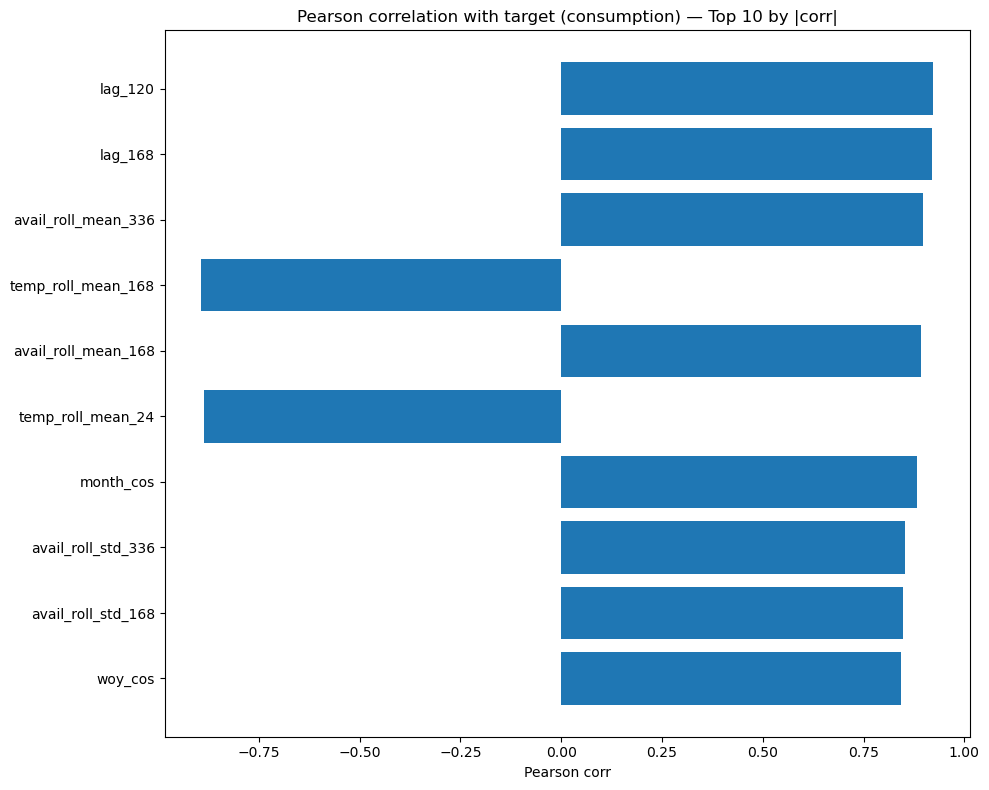

In [13]:
# ==========================================
# Correlation analysis — 1) target vs feature
# ==========================================
# Computes Pearson correlation between y and each selected feature.
# This is primarily a sanity-check / redundancy tool (linear relationship only).

import pandas as pd

# Pearson correlations: corr(feature, target)
corr_target = corr_df.corr(numeric_only=True)[target_col].drop(labels=[target_col]).sort_values(key=np.abs, ascending=False)

corr_target_df = corr_target.reset_index()
corr_target_df.columns = ["feature", "pearson_corr_with_target"]
display(corr_target_df.head(30))

# Bar plot of top absolute correlations
TOP_N = 10
top = corr_target_df.head(TOP_N).iloc[::-1]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(top["feature"], top["pearson_corr_with_target"])
plt.title(f"Pearson correlation with target ({target_col}) — Top {TOP_N} by |corr|")
plt.xlabel("Pearson corr")
plt.tight_layout()
plt.show()


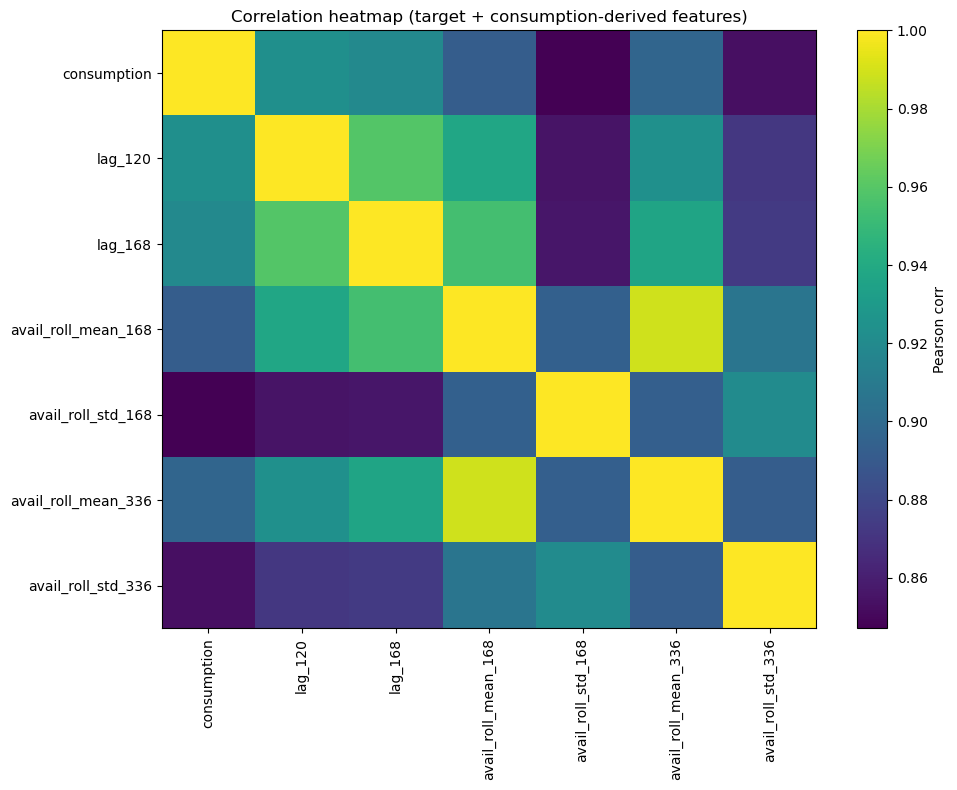

,consumption,lag_120,lag_168,avail_roll_mean_168,avail_roll_std_168,avail_roll_mean_336,avail_roll_std_336
consumption,1.000,0.923,0.919,0.892,0.847,0.897,0.854
lag_120,0.923,1.000,0.959,0.937,0.855,0.924,0.872
lag_168,0.919,0.959,1.000,0.955,0.856,0.937,0.873
avail_roll_mean_168,0.892,0.937,0.955,1.000,0.894,0.989,0.907
avail_roll_std_168,0.847,0.855,0.856,0.894,1.000,0.893,0.921
avail_roll_mean_336,0.897,0.924,0.937,0.989,0.893,1.000,0.892
avail_roll_std_336,0.854,0.872,0.873,0.907,0.921,0.892,1.000


In [12]:
# ==========================================
# Correlation analysis — 2) feature-feature heatmap (focused)
# ==========================================
# Best used to detect redundancy among consumption-derived features:
# lag_*, avail_roll_* (often highly correlated)

import matplotlib.pyplot as plt

# Choose a focused subset for a readable heatmap
heatmap_cols = [target_col] + [c for c in corr_features if c.startswith("lag_") or c.startswith("avail_roll_")]

heat_df = corr_df[heatmap_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(heat_df.values, aspect="auto")
plt.xticks(range(len(heat_df.columns)), heat_df.columns, rotation=90)
plt.yticks(range(len(heat_df.index)), heat_df.index)
plt.title("Correlation heatmap (target + consumption-derived features)")
plt.colorbar(label="Pearson corr")
plt.tight_layout()
plt.show()

display(heat_df.round(3))


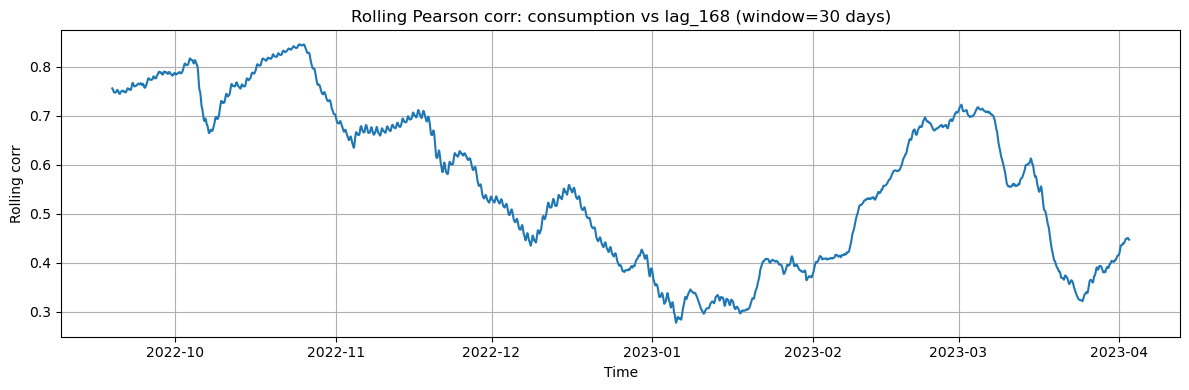

In [14]:
# ==========================================
# Correlation analysis — 3) rolling correlation (diagnose regime shifts)
# ==========================================
# Rolling correlation between target and a key lag feature (e.g., lag_168)
# Useful to see if relationship changes over time (seasonality / structural changes)

import matplotlib.pyplot as plt

key_feature = "lag_168" if "lag_168" in corr_df.columns else None
if key_feature is None:
    raise ValueError("lag_168 not found in corr_df. Check your feature engineering.")

window_days = 30
window_h = window_days * 24

roll_corr = corr_df[target_col].rolling(window_h).corr(corr_df[key_feature])

plt.figure(figsize=(12, 4))
plt.plot(roll_corr.index, roll_corr.values)
plt.title(f"Rolling Pearson corr: {target_col} vs {key_feature} (window={window_days} days)")
plt.xlabel("Time")
plt.ylabel("Rolling corr")
plt.grid(True)
plt.tight_layout()
plt.show()


,pearson_corr_with_target
temperature,-0.817352
heating_degree_18,0.820590


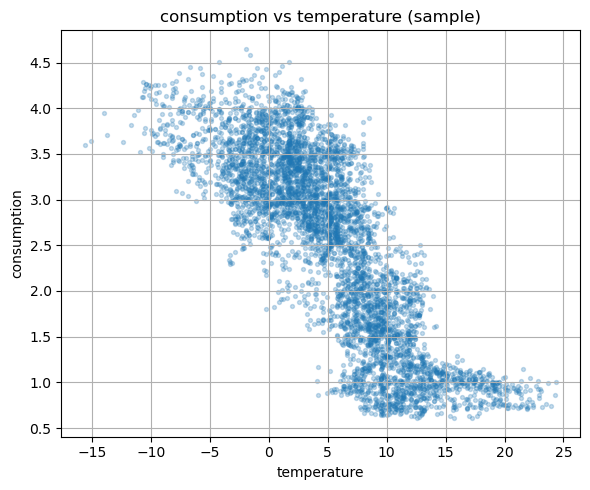

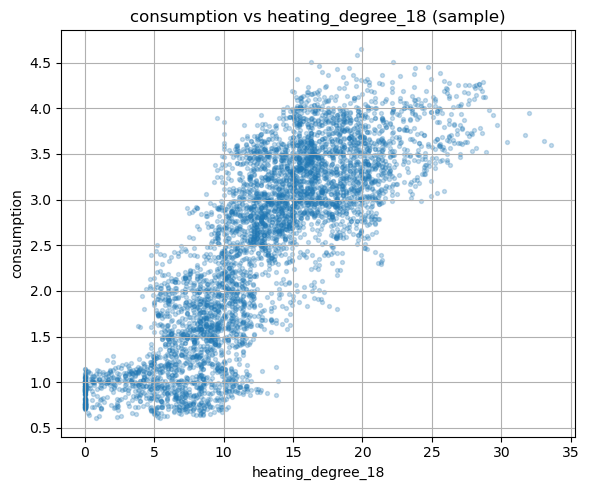

In [15]:
# ==========================================
# Correlation analysis — 4) temperature relationship sanity check
# ==========================================
# Quick look at correlation between target and temperature/heating degree.
# Note: can be nonlinear; correlation is only a rough check.

import matplotlib.pyplot as plt

temp_candidates = [c for c in ["temperature", "heating_degree_18"] if c in corr_df.columns]
if len(temp_candidates) == 0:
    print("No temperature columns found (temperature/heating_degree_18). Skipping.")
else:
    sub = corr_df[[target_col] + temp_candidates].corr(numeric_only=True)[target_col].drop(target_col)
    display(sub.to_frame("pearson_corr_with_target"))

    # scatter (sample)
    sample = corr_df.sample(min(5000, len(corr_df)), random_state=42)
    for c in temp_candidates:
        plt.figure(figsize=(6, 5))
        plt.scatter(sample[c], sample[target_col], s=8, alpha=0.25)
        plt.title(f"{target_col} vs {c} (sample)")
        plt.xlabel(c)
        plt.ylabel(target_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


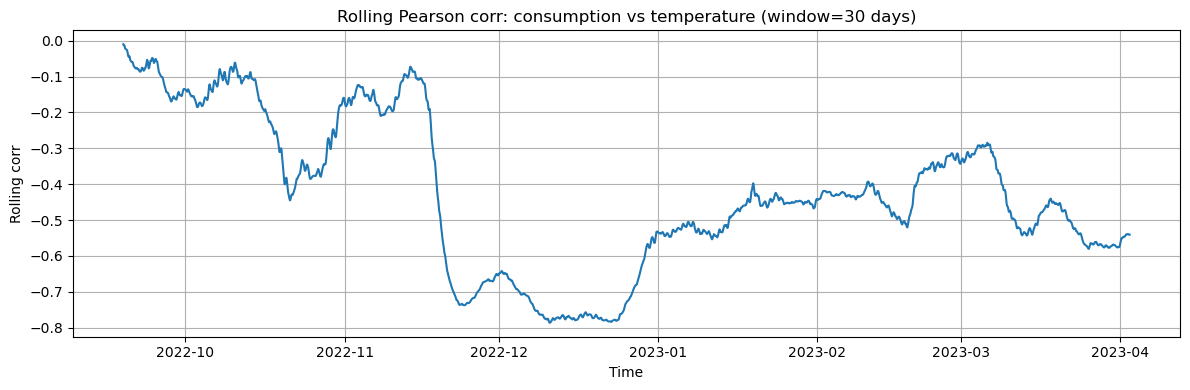

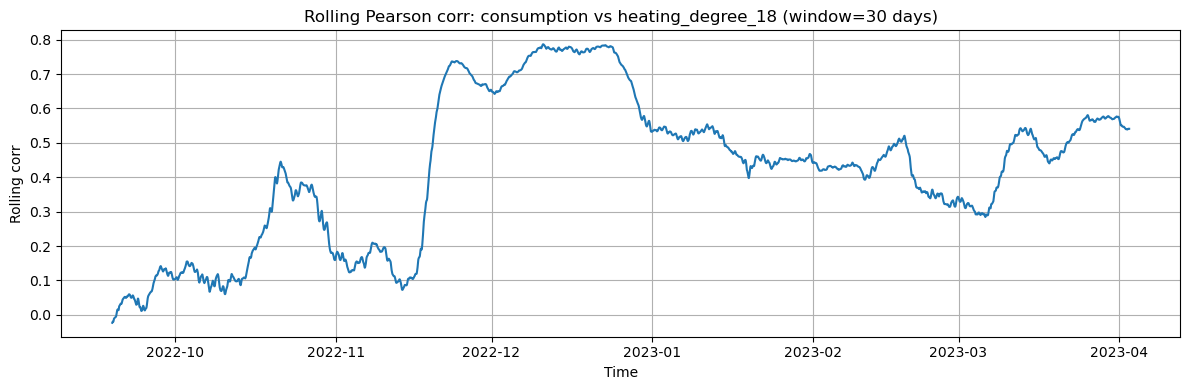

In [16]:
# ==========================================
# Rolling Pearson correlation: consumption vs temperature
# ==========================================
# Computes rolling correlation between consumption(t) and temperature(t)
# (and optionally heating_degree_18 if it exists).
#
# Uses: `data` (feature-engineered dataframe with DatetimeIndex)
# Assumes columns: "consumption" and "temperature" (adjust if needed)

import pandas as pd
import matplotlib.pyplot as plt

target_col = "consumption"
temp_col = "temperature"   # <-- change if your column name differs

window_days = 30
window_h = window_days * 24

# Ensure datetime index and numeric cols
df_corr = data[[target_col, temp_col]].copy()
df_corr.index = pd.to_datetime(df_corr.index)
df_corr[target_col] = pd.to_numeric(df_corr[target_col], errors="coerce")
df_corr[temp_col] = pd.to_numeric(df_corr[temp_col], errors="coerce")
df_corr = df_corr.dropna()

roll_corr_temp = df_corr[target_col].rolling(window_h).corr(df_corr[temp_col])

plt.figure(figsize=(12, 4))
plt.plot(roll_corr_temp.index, roll_corr_temp.values)
plt.title(f"Rolling Pearson corr: {target_col} vs {temp_col} (window={window_days} days)")
plt.xlabel("Time")
plt.ylabel("Rolling corr")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: also plot consumption vs heating_degree_18 (often more linear)
if "heating_degree_18" in data.columns:
    df_hd = data[[target_col, "heating_degree_18"]].copy()
    df_hd.index = pd.to_datetime(df_hd.index)
    df_hd = df_hd.dropna()

    roll_corr_hd = df_hd[target_col].rolling(window_h).corr(df_hd["heating_degree_18"])

    plt.figure(figsize=(12, 4))
    plt.plot(roll_corr_hd.index, roll_corr_hd.values)
    plt.title(f"Rolling Pearson corr: {target_col} vs heating_degree_18 (window={window_days} days)")
    plt.xlabel("Time")
    plt.ylabel("Rolling corr")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
